# Part 1. The ”Rock Paper Scissors” game

We consider the sequential version of a repeated two-player zero-sum game
between a player and an adversary, whose setting is detailed below. Let L ∈
{−1,1}M×N be a loss matrix known by the players. At each round t= 1,...,T:
1. The player chooses a distribution pt ∈∆M 
2. The adversary chooses a distribution qt ∈∆N.
3. The actions of both players are sampled It ∼pt and Jt ∼qt.
4. The player incurs the loss L(Jt ,It) and the adversary the loss−L(It ,Jt).


## Imports

In [120]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Rock Paper Scissors matrix

Recall M,N and a loss matrix L∈{−1,1}M×N that corresponds to the game
”Rock Paper Scissors”

In [121]:
# Ici M = N = 3, donc on a a une matrice de pertes 3x3 avec en ligne et en colonne dans l'ordre : Rock, Paper, Scissors
loss_matrix = np.array([[0, 1, -1],
                        [-1, 0, 1],
                        [1, -1, 0]])
actions = ['Rock', 'Paper', 'Scissors']

## 2. Implementation of EWA

(a) Implement the function rand weighted that takes as input a probability
vector p∈∆M and return I = 1,...,M satisfying P(I= i) = pi.

In [122]:
def rand_weight (p):
    """
    p :vecteur d3 de proba
    i :l'index i choisi selon la loi p
    """
    uni = np.random.uniform(0, 1)
    somme = 0.0              # Mon idée : on place p1, p2, p3 sur [0,1] et on tire un uniforme. 
    for i in range(3):
        somme += p[i]
        if uni < somme :    # Si le tirage est dans l'intervalle de pi, on renvoie i
            return i 

In [123]:
# Test empirique de rand_weight
p0 = np.array([1/3, 1/6, 1/2])
counts = np.zeros(3)
n_trials = 100000
for _ in range(n_trials):
    i = rand_weight(p0)
    counts[i] += 1
print("Empirical probabilities:", counts / n_trials)


Empirical probabilities: [0.3333  0.16568 0.50102]


(b) Define a function EWA update that takes as input a vector pt ∈∆M and
a loss vector ℓt ∈{−1,1}M and returns the updated vector pt+1 ∈∆M

In [124]:
#Je rajoute un paramètre eta non demandé dans l'énoncé pour correspondre à la définition de p_t+1
def EWA_uptade(p, loss_vector, eta = 0.5):  
    """
    p : vecteur de proba d3
    loss_vector : vecteur de pertes d3
    
    return : nouveau vecteur de proba
    """
    new_p = np.zeros(3)
    Z = 0.0
    for i in range(3):
        new_p[i] = p[i] * np.exp(-eta * loss_vector[i])
        Z += new_p[i]
    new_p /= Z
    return new_p

In [125]:
p0 = np.array([1/3, 1/3, 1/3])

## 3. Simulation against a fixed adversary

Consider the game ”Rock Paper Scissors” and assume that the adversary chooses
qt = (1/6,1/3,1/2) and samples Jt ∼qt for all rounds t≥1.

(a) What is the loss ℓt(i) incurred by the player if she chooses action i at time t? 

**On ne peut pas donner une valaeur exacte pour Lt(i), car c'est une variable aléatoire, mais E[Lt] = [1/6 , -2/6 , 1/6]**

Simulate an instance of the game for t= 1,...,T = 100 for η= 1.

In [126]:
def simulation_EWA (T, p0, q0, loss_matrix, eta=0.5):
    """
    T : nombre de tours
    p0 : vecteur de proba initial
    loss_matrix : matrice des pertes
    
    return : liste des vecteurs de proba à chaque tour
    """
    proba_joueur = p0
    proba_adversaire = q0
    evolution_probas = [proba_joueur.copy()]
    losses = np.zeros(T)
    for i in range (T):
        action_joueur = rand_weight(proba_joueur)
        action_adversaire = rand_weight(proba_adversaire)

        loss_ijt = loss_matrix[action_joueur, action_adversaire]   
        losses[i] = loss_ijt

        loss_vector = loss_matrix[:, action_adversaire]
        new_proba = EWA_uptade(proba_joueur, loss_vector, eta)
        proba_joueur = new_proba
        evolution_probas.append(proba_joueur.copy())

    return evolution_probas, losses

In [127]:
T = 100
proba_joueur = np.array([1/3, 1/3, 1/3])
proba_adversaire = np.array([1/6, 1/3, 1/2])
evolution_probas, losses = simulation_EWA(T, proba_joueur, proba_adversaire, loss_matrix, eta=1)

(b) Plot the evolution of the weight vectors p1,p2,...,pT. What seems to be the best strategy here?

**-->Comme dans le calcul de l'espérance de Lt, on observe bien que :**

**-jouer Papier est perdant**

**-l'algo switch entre Pierre et Ciseaux qui sont équi-gagnant, avec des changements brutaux dus à la 'grande' taille d'éta**

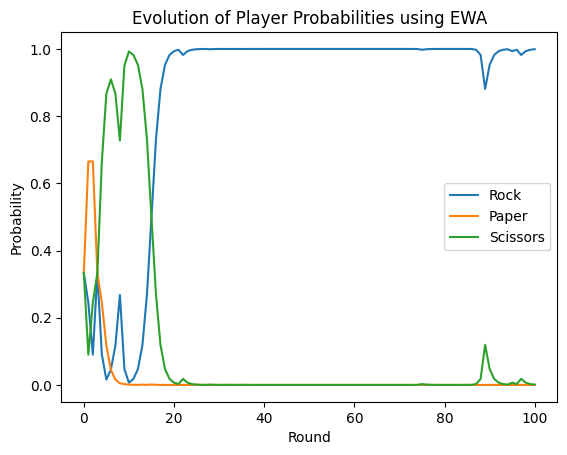

In [128]:
plt.plot([p[0] for p in evolution_probas], label='Rock')
plt.plot([p[1] for p in evolution_probas], label='Paper')
plt.plot([p[2] for p in evolution_probas], label='Scissors')
plt.xlabel('Round')
plt.ylabel('Probability')
plt.title('Evolution of Player Probabilities using EWA')
plt.legend()
plt.show()


(c) Repeat the simulation n = 200 times and plot the average loss ℓt =
1
t
t
s=1 ℓ(is,js) as a function of t (averaged over the experiments).

<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
/var/folders/2b/txz191yj65l8dvw4jln17n680000gn/T/ipykernel_61721/3756341627.py:22: SyntaxWarning: invalid escape sequence '\e'
  plt.title("Average cumulative loss over n = 200 simulations (EWA, $\eta=1$)")


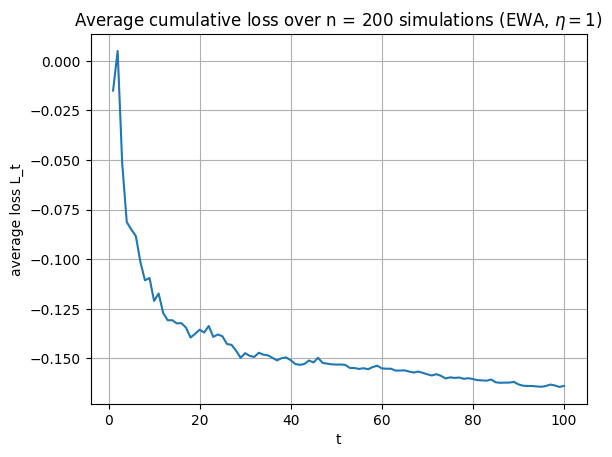

In [129]:
n_experiments = 200
eta = 1
L = loss_matrix
q = np.array([1/6, 1/3, 1/2])

all_losses = np.zeros((n_experiments, T))  # shape: (n_experiments, T)

for exp in range(n_experiments):
    truc, all_losses[exp, :] = simulation_EWA(T, proba_joueur, q, L, eta)

# pertes cumulées par expérience
cum_losses = all_losses.cumsum(axis=1)                      # somme sur le temps
t_grid = np.arange(1, T + 1)
avg_loss_per_exp = cum_losses / t_grid                     # \bar ℓ_t pour chaque exp
avg_loss_over_exps = avg_loss_per_exp.mean(axis=0)         # moyenne sur les 200 exp

# --- plot de \bar ℓ_t en fonction de t ---
plt.figure()
plt.plot(t_grid, avg_loss_over_exps)
plt.xlabel("t")
plt.ylabel("average loss L_t")
plt.title("Average cumulative loss over n = 200 simulations (EWA, $\eta=1$)")
plt.grid(True)
plt.show()

(d) Repeat one simulation for diﬀerent values of learning rates η∈{0.01,0.03,0.1,0.3,1} and plot the average loss as a function of η. What are the best ηin practice and in theory?

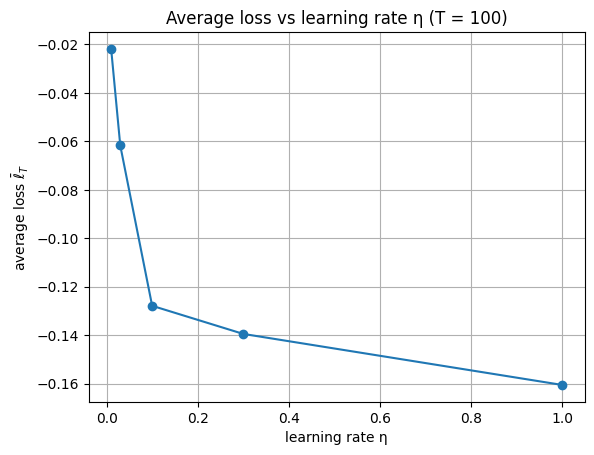

In [130]:
liste_etas = [0.01, 0.03, 0.1, 0.3, 1]

avg_losses_eta = []
n_rep = 200

for eta in liste_etas:
    mean_losses = []
    for _ in range(n_rep):
        truc ,losses = simulation_EWA(T, proba_joueur, q, L, eta)
        mean_losses.append(losses.mean())   # \bar ℓ_T pour cette run
    avg_losses_eta.append(np.mean(mean_losses))  # moyenne sur les répétitions

plt.figure()
plt.plot(liste_etas, avg_losses_eta, marker="o")
plt.xlabel("learning rate η")
plt.ylabel("average loss $\\bar{\\ell}_T$")
plt.title("Average loss vs learning rate η (T = {})".format(T))
plt.grid(True)
plt.show()

Ici le meilleur éta change selon les itérations du code. Entre 0.3 et 0.1 et ce même en lissant en faisant 200 simulation.

En théorie, le regret (eta) < log (M)/eta + C* eta * T,

## 4. Implementation of OGD

(a) Define the Euclidean projection over the simplex proj simplex that takes x ∈RN and returns its projection Proj∆N (x) ∈∆N.

In [131]:
def proj_simplex(x):
    """
    x : vecteur réel 
    return : vecteur q dans le simplexe (positif, somme = 1)
    """
    N = x.size

    # 1) Trier x en ordre décroissant
    u = np.sort(x)[::-1]
    # 2) Sommes cumulées
    cssv = np.cumsum(u)
    # 3) Trouver rho = max { j : u_j + (1 - sum_{k<=j} u_k) / j > 0 }
    rho = np.where(u + (1 - cssv) / np.arange(1, N + 1) > 0)[0][-1]
    # 4) Calculer le seuil theta
    theta = (cssv[rho] - 1) / (rho + 1)
    # 5) Projeter
    q = np.maximum(x - theta, 0.0)
    return q

In [132]:
def OGD_update(q_t, loss_vector, t):
    """
    q_t : vecteur de proba courant de l'adversaire
    loss_vector : vecteur des pertes L_{I_t, j}
    t : numéro du tour (t >= 1), sert à calculer eta_t = 1/sqrt(t)

    return : nouveau vecteur de proba q_{t+1} dans le simplexe
    """
    eta_t = 1 / np.sqrt(t)
    grad = loss_vector
    q_tilde = q_t - eta_t * grad
    q_next = proj_simplex(q_tilde)
    return q_next

## 5. EWA vs OGD
Run an experiment of the game ”Rock Paper Scissors” in which EWA is the
player and OGD the adversary. Define ¯ pt =
1
t
t
s=1 ps. Plot in log log scale
∥¯
pt−(1/3,1/3,1/3)∥2 as a function of t= 1,...,10000.

In [134]:
T = 10000

# Probas initiales
p0 = np.array([1/3, 1/3, 1/3])
q0 = np.array([1/3, 1/3, 1/3])

eta_player = 0.3

proba_joueur = p0.copy()
proba_adversaire = q0.copy()

# pour la moyenne \bar p_t
p_bar = np.zeros(3)
uniform = np.array([1/3, 1/3, 1/3])
norm_diffs = np.zeros(T)

for t in range(1, T + 1):
    # 1) moyenne \bar p_t (en incluant p_t courant)
    p_bar = ((t - 1) * p_bar + proba_joueur) / t
    norm_diffs[t - 1] = np.linalg.norm(p_bar - uniform)

    # 2) tirage des actions selon p_t et q_t
    action_joueur = rand_weight(proba_joueur)
    action_adversaire = rand_weight(proba_adversaire)

    # 3) pertes instantanées pour construire les vecteurs de pertes
    #    pour le joueur (EWA) : L_{i, J_t} -> colonne de loss_matrix
    loss_vector_player = loss_matrix[:, action_adversaire]

    #    pour l'adversaire (OGD) : L_{I_t, j} -> ligne de loss_matrix
    loss_vector_adversaire = loss_matrix[action_joueur, :]

    # 4) mise à jour EWA (joueur)
    proba_joueur = EWA_uptade(proba_joueur, loss_vector_player, eta=eta_player)

    # 5) mise à jour OGD (adversaire)
    proba_adversaire = OGD_update(proba_adversaire, loss_vector_adversaire, t)

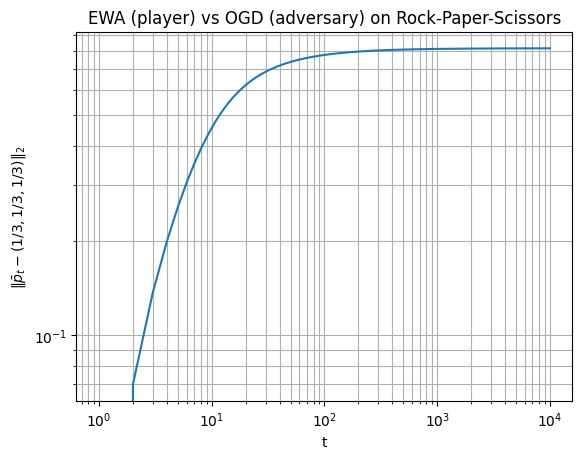

In [135]:
t_grid = np.arange(1, T + 1)

plt.figure()
plt.loglog(t_grid, norm_diffs)
plt.xlabel("t")
plt.ylabel(r"$\|\bar p_t - (1/3,1/3,1/3)\|_2$")
plt.title("EWA (player) vs OGD (adversary) on Rock-Paper-Scissors")
plt.grid(True, which="both")
plt.show()

## 6. Hedge vs OGD

(a) Define a function Hedge update that takes as input a vector pt, the adversary’s strategy qt, and returns pt+1 ∈∆N.

In [145]:
def Hedge_update(p_t, q_t, eta):
    """
    Mise à jour Hedge pour le joueur.

    p_t : vecteur de proba courant du joueur 
    q_t : stratégie de l'adversaire 

    return : p_{t+1} dans le simplexe
    """

    loss_vector_player = q_t @ loss_matrix

    # mise à jour exponentielle (comme EWA, mais avec la perte moyenne)
    weights = p_t * np.exp(-eta * loss_vector_player)
    p_next = weights / weights.sum()
    return p_next

(b) Run an experiment of the game ”Rock Paper Scissors” in which Hedge is
the player and OGD the adversary. Define ¯ pt =
1
t
t
s=1 ps. Plot in log log
scale ∥¯
pt−(1/3,1/3,1/3)∥2 as a function of t = 1,...,10000. Compare
with the results obtained in Question 5.

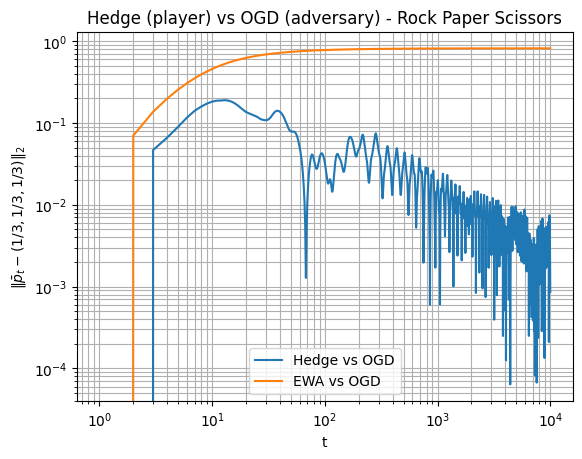

In [146]:
T = 10000

# proba initiales
p0 = np.array([1/3, 1/3, 1/3])
q0 = np.array([1/3, 1/3, 1/3])

proba_joueur = p0.copy()
proba_adversaire = q0.copy()

eta_player = 0.3 

p_bar = np.zeros(3)
uniform = np.array([1/3, 1/3, 1/3])

norm_diffs_hedge = np.zeros(T)

for t in range(1, T + 1):
    # moyenne p_t BAR
    p_bar = ((t - 1) * p_bar + proba_joueur) / t
    norm_diffs_hedge[t - 1] = np.linalg.norm(p_bar - uniform)

    action_joueur = rand_weight(proba_joueur)
    action_adversaire = rand_weight(proba_adversaire)

    loss_vector_adversaire = loss_matrix[action_joueur, :]

    # --- mise à jour Hedge (joueur) ---
    proba_joueur = Hedge_update(proba_joueur, proba_adversaire, eta=eta_player)

    # --- mise à jour OGD (adversaire) ---
    proba_adversaire = OGD_update(proba_adversaire, loss_vector_adversaire, t)

# --- Plot en log-log ---
t_grid = np.arange(1, T + 1)

plt.figure()
plt.loglog(t_grid, norm_diffs_hedge, label="Hedge vs OGD")
plt.loglog(t_grid, norm_diffs, label="EWA vs OGD")
plt.xlabel("t")
plt.ylabel(r"$\|\bar p_t - (1/3,1/3,1/3)\|_2$")
plt.title("Hedge (player) vs OGD (adversary) - Rock Paper Scissors")
plt.grid(True, which="both")
plt.legend()
plt.show()

### EWA finit par toujours jouer la même action contre un adversaire OGD, d'ou norm_diffs tend vers une constante non nulle.
### Hedge, en revanche, semble bien converger vers la stratégie uniforme contre un adversaire OGD.